# ADVERTISING SALES CHANNEL PREDICTION


 The predict the total sales generated from all the sales channel.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv(r'C:/Users/user/Desktop/DT Python/Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
df_raw=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df_raw

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [6]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
df.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [9]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [11]:
 df.iterrows

<bound method DataFrame.iterrows of      Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [12]:
df.shape

(200, 5)

In [14]:
df.describe(include='all')

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [16]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

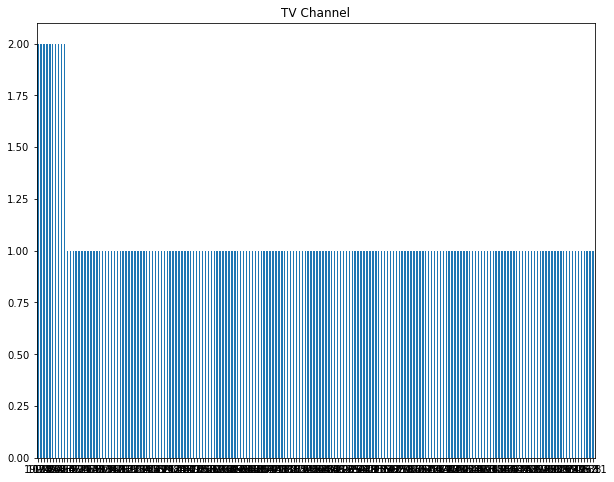

In [17]:
plt.subplot()
df['TV'].value_counts().plot(kind='bar' , title='TV Channel',figsize=(10,8))
plt.xticks(rotation=0)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166]),
 [Text(0, 0, '4.1'),
  Text(1, 0, '5.7'),
  Text(2, 0, '13.

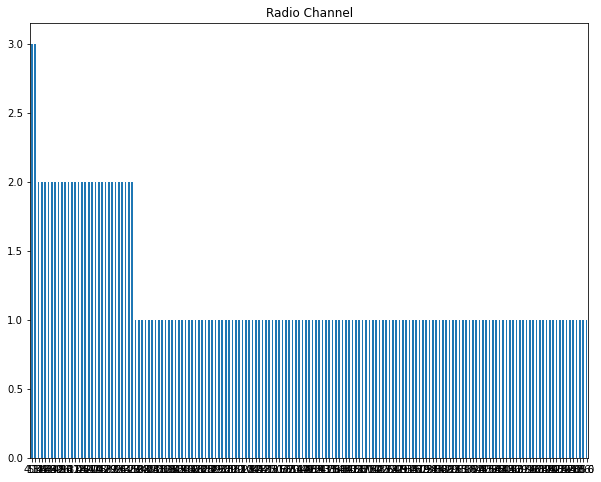

In [18]:
plt.subplot()
df['radio'].value_counts().plot(kind='bar' , title='Radio Channel' , figsize=(10,8))
plt.xticks(rotation=0)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171]),
 [Text(0, 0, '9.3'),
  Tex

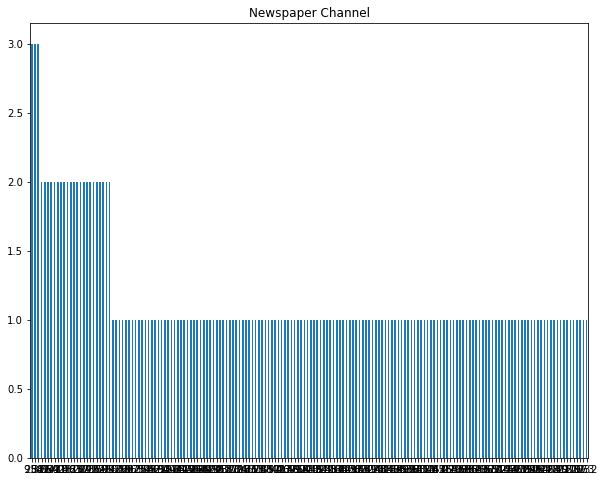

In [19]:
plt.subplot()
df['newspaper'].value_counts().plot(kind='bar' , title='Newspaper Channel' , figsize=(10,8))
plt.xticks(rotation=0)

<AxesSubplot:>

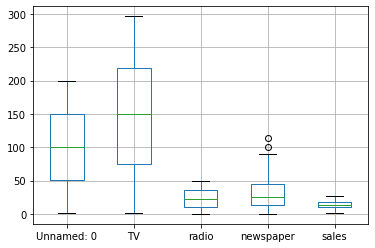

In [20]:
df.boxplot()

<AxesSubplot:xlabel='sales', ylabel='Density'>

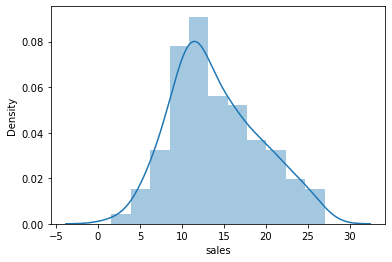

In [21]:
sns.distplot(df['sales'])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

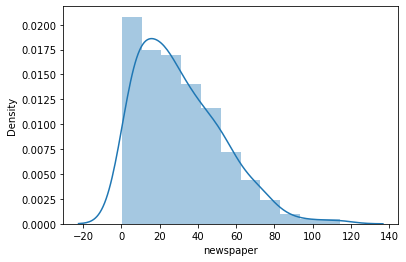

In [22]:
sns.distplot(df['newspaper'])

<AxesSubplot:xlabel='radio', ylabel='Density'>

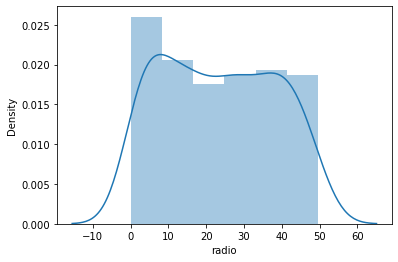

In [23]:
sns.distplot(df['radio'])

<AxesSubplot:xlabel='TV', ylabel='Density'>

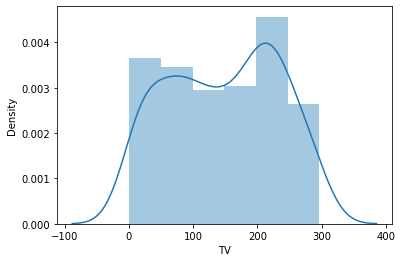

In [24]:
sns.distplot(df['TV'])

In [25]:
corr= df.corr()

In [26]:
corr

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


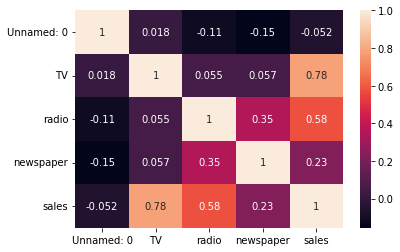

In [28]:
sns.heatmap(corr, annot=True)
plt.yticks(rotation=0)
plt.show()

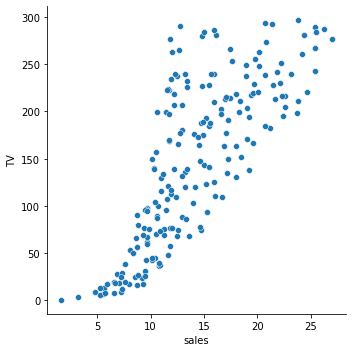

In [31]:
sns.relplot(x='sales' , y='TV'  , data=df)

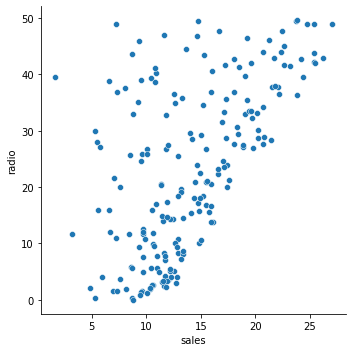

In [32]:
sns.relplot(x='sales' , y='radio' , data=df)

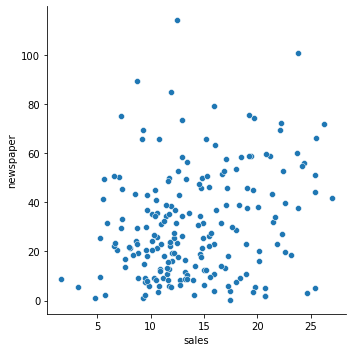

In [33]:
sns.relplot(x='sales' , y='newspaper' , data=df)

<AxesSubplot:>

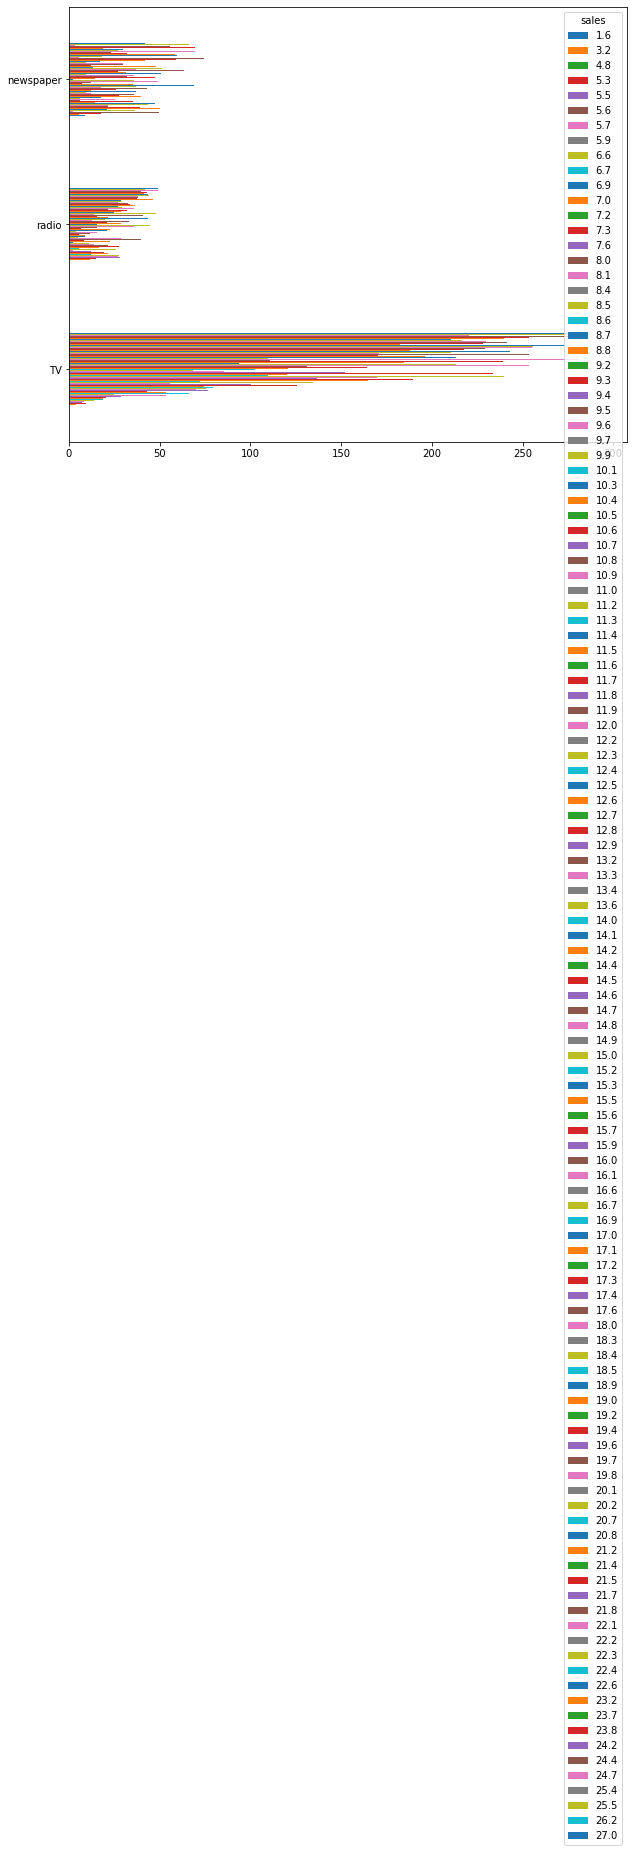

In [39]:
df.groupby('sales')[['TV' , 'radio' , 'newspaper']].mean().T.plot(kind='barh' , figsize=(10,8))

In [40]:
df.nunique()

Unnamed: 0    200
TV            190
radio         167
newspaper     172
sales         121
dtype: int64

OUTLIER  ANALYSIS

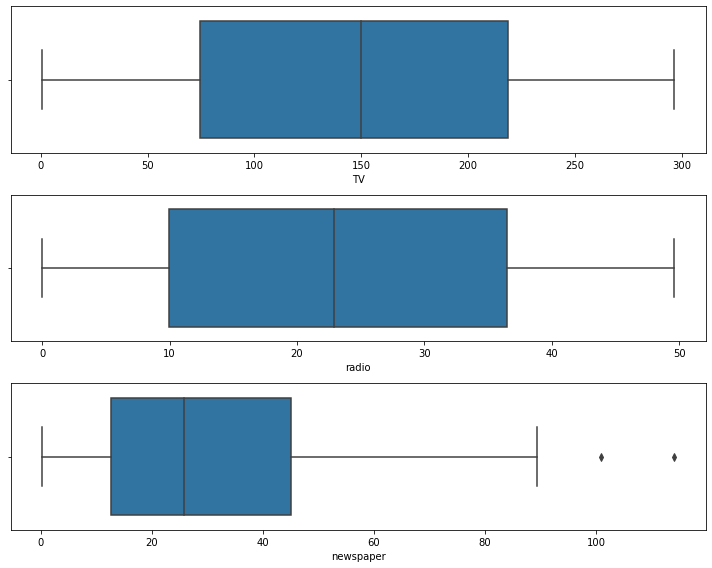

In [46]:
fig, axs = plt.subplots(3, figsize=(10,8))
plt1 = sns.boxplot(df['TV'], ax=axs[0])
plt2 = sns.boxplot(df['radio'] , ax=axs[1])
plt3 = sns.boxplot(df['newspaper'] , ax=axs[2])
plt.tight_layout()

In [49]:
df.describe

<bound method NDFrame.describe of      Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

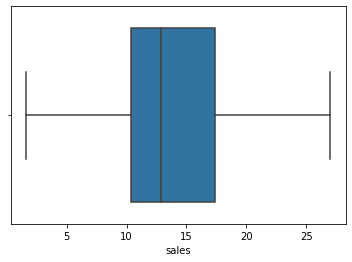

In [50]:
sns.boxplot(df['sales'])
plt.show()

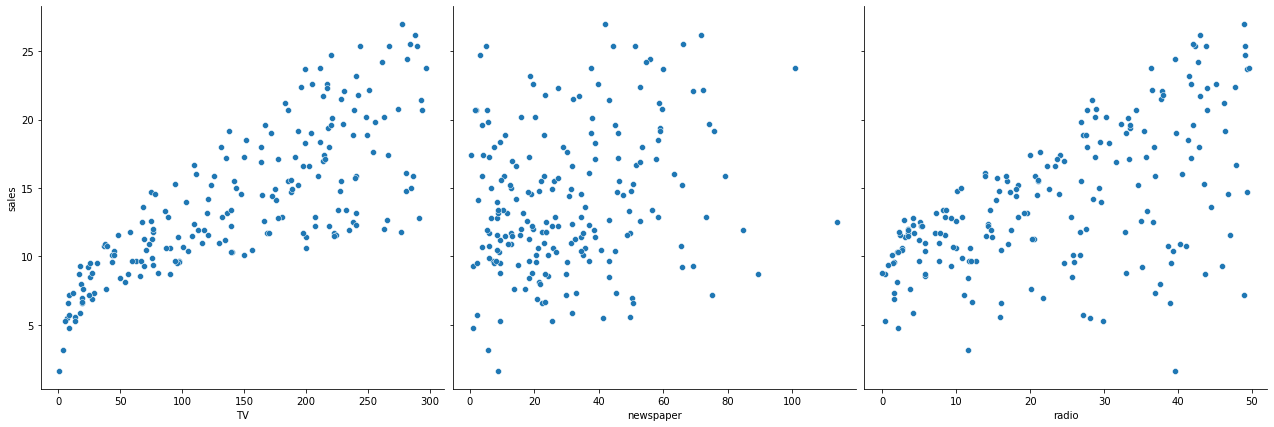

In [51]:
# sales are related with other variables using scatter plot
sns.pairplot(df, x_vars=['TV' , 'newspaper' , 'radio' ],
                       y_vars='sales' , height=6, aspect=1, kind='scatter')
plt.show()

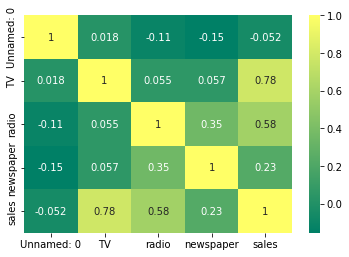

In [53]:
sns.heatmap(df.corr(), cmap="summer" , annot=True)
plt.show()

In [54]:
x=df['TV']
y=df['sales']

In [55]:
x

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [56]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [59]:
x_train.head()

79     116.0
197    177.0
38      43.1
24      62.3
122    224.0
Name: TV, dtype: float64

In [60]:
y_train.head()

79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
Name: sales, dtype: float64

In [61]:
import statsmodels.api as sm

In [62]:
x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train,x_train_sm).fit()

In [63]:
lr.params

const    7.119638
TV       0.046530
dtype: float64

In [64]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     228.5
Date:                Thu, 21 Jul 2022   Prob (F-statistic):           1.68e-32
Time:                        15:30:52   Log-Likelihood:                -415.93
No. Observations:                 160   AIC:                             835.9
Df Residuals:                     158   BIC:                             842.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1196      0.530     13.446      0.0

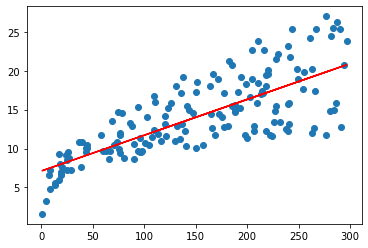

In [67]:
plt.scatter(x_train,y_train)
plt.plot(x_train, 7.119 + 0.046*x_train, 'r')
plt.show()

Here, the values we concerned with  the coefficients and p-values , r-squared , f-statistical.
linear regression equation becomes  sales = 7.119 + 0.046 x TV

In [69]:
y_train_pred = lr.predict(x_train_sm)
res = (y_train - y_train_pred)


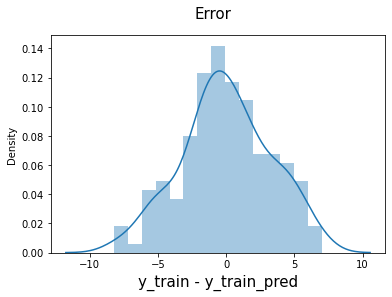

In [70]:
fig = plt.figure()
sns.distplot(res,bins=15)
fig.suptitle('Error'  , fontsize = 15)
plt.xlabel('y_train - y_train_pred' , fontsize = 15)
plt.show()

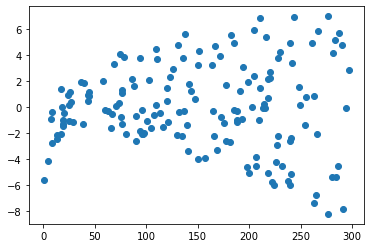

In [71]:
plt.scatter(x_train,res)
plt.show()

In [72]:
x_test_sm = sm.add_constant(x_test)

In [74]:
y_pred = lr.predict(x_test_sm)

In [76]:
y_pred.head()

95     14.717944
15     16.211548
30     20.748197
158     7.664036
128    17.370139
dtype: float64

In [77]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test , y_pred))

3.194472431998899

In [78]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test , y_pred)
r_squared

0.6766954295627075

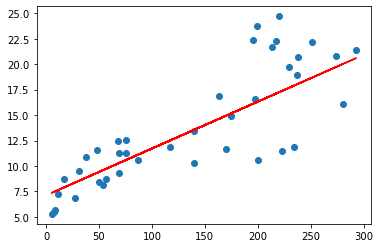

In [80]:
#Visualizing the fit on the test set
plt.scatter(x_test, y_test)
plt.plot(x_test, 7.119 + 0.046*x_test, 'r')
plt.show()

# 

# THANK YOU